In [ ]:
# Insatll packages
!pip install flaml
!pip install catboost
!pip install django
#!pip install prophet
!pip install statsmodels==0.12.1
!pip install transformers
!pip install datasets
!pip install pyyaml==5.4.1

     |████████████████████████████████| 154 kB 25.2 MB/s 
     |████████████████████████████████| 2.0 MB 39.1 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3
     |████████████████████████████████| 76.1 MB 69 kB/s 
     |████████████████████████████████| 7.9 MB 24.5 MB/s 
     |████████████████████████████████| 9.5 MB 24.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 3.8 MB 31.7 MB/s 
     |████████████████████████████████| 895 kB 42.2 MB/s 
     |████████████████████████████████| 596 kB 68.1 MB/s 
     |████████████████████████████████| 6.5 MB 46.5 MB/s 
     |████████████████████████████████| 67 kB 4.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstal

In [ ]:
# Import packages
import pandas as pd 
import numpy as np 
import statsmodels 
import transformers
import datasets
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from flaml import AutoML 
from flaml.data import get_output_from_log
from django.conf import settings
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
# Prepare data
dataset = load_iris()
x = dataset.data
y = dataset.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2, random_state = 100)

In [ ]:
# Function for visualizations of all estimators accuracy over time
# x: x_train/values
# y: y_train/values
# t: task
def interVis(x, y, t):
  # Log Creation
  
  automl = AutoML()

  automl.fit(x, y, 
               task=t,
               log_type = 'all',
               estimator_list = ['lgbm'],
               log_file_name = 'iter_lbgm.log') #lgbm log
  lgbm_best = automl.best_config

  automl.fit(x, y, 
               task=t,
               log_type = 'all',
               estimator_list = ['xgboost'],
               log_file_name = 'iter_xgboost.log') #xgb log
  xgb_best = automl.best_config


  # Output retreival
  
  
  time_history_lgbm, best_valid_loss_history_lgbm, valid_loss_history_lgbm, config_history_lgbm, metric_history_lgbm = \
      get_output_from_log(filename="iter_lbgm.log", time_budget=60) #lgbm output

  time_history_xgb, best_valid_loss_history_xgb, valid_loss_history_xgb, config_history_xgb, metric_history_xgb = \
      get_output_from_log(filename="iter_xgboost.log", time_budget=60) #xgb output

 
  # Visualization
    
  plt.step(time_history_lgbm, 1 - np.array(best_valid_loss_history_lgbm), label='lgbm') #lgbm 
  plt.step(time_history_xgb, 1-np.array(best_valid_loss_history_xgb), label='xgb') #xgb
  

  plt.title("Learning Curve")
  plt.xlabel("Wall Clock Time (s)")
  plt.ylabel("Validation Accuracy")
  plt.legend(title = "Estimator list:")
  plt.show()

  # Best hyperparameters for each estimator
  hyper_data = {"Estimator":['lgbm', 'xgb'], "Hyperparameters":[lgbm_best, xgb_best]}
  hyper_df = pd.DataFrame(hyper_data)
  print(hyper_df)

[flaml.automl: 03-24 19:57:42] {2068} INFO - task = classification
[flaml.automl: 03-24 19:57:42] {2070} INFO - Data split method: stratified
[flaml.automl: 03-24 19:57:42] {2074} INFO - Evaluation method: cv
[flaml.automl: 03-24 19:57:42] {2155} INFO - Minimizing error metric: log_loss
[flaml.automl: 03-24 19:57:42] {2248} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl: 03-24 19:57:42] {2501} INFO - iteration 0, current learner lgbm
[flaml.automl: 03-24 19:57:42] {2617} INFO - Estimated sufficient time budget=2069s. Estimated necessary time budget=2s.
[flaml.automl: 03-24 19:57:42] {2669} INFO -  at 0.3s,	estimator lgbm's best error=0.6749,	best estimator lgbm's best error=0.6749
[flaml.automl: 03-24 19:57:42] {2501} INFO - iteration 1, current learner lgbm
[flaml.automl: 03-24 19:57:42] {2669} INFO -  at 0.3s,	estimator lgbm's best error=0.6749,	best estimator lgbm's best error=0.6749
[flaml.automl: 03-24 19:57:42] {2501} INFO - iteration 2, current learner lgbm
[fl

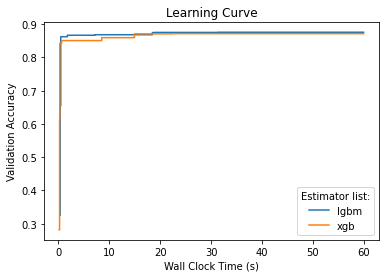

  Estimator                                    Hyperparameters
0      lgbm  {'n_estimators': 4, 'num_leaves': 8, 'min_chil...
1       xgb  {'n_estimators': 5, 'max_leaves': 4, 'min_chil...


In [ ]:
interVis(x_train, y_train, "classification")